In [44]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
all_file = glob.glob('../../data/processed/apple_watch_format/S*.csv')

In [3]:
df = pd.concat([pd.read_csv(file) for file in all_file], ignore_index=True, axis=0)
df.head()

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8
1,39.252000,-47.664667,7.822000,62.549339,0.544205,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8
2,39.628667,-46.246667,9.764000,62.469299,1.120992,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8
3,38.927333,-48.439333,6.083333,62.442314,0.428267,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8


In [4]:
df.value_counts('label')

label
1    602
2    252
4    114
3    107
Name: count, dtype: int64

In [6]:
label = {
    1: 'baseline',
    2: 'stress',
    3: 'amusement',
    4: 'meditation'
}

In [13]:
df['label_text'] = df['label'].map(label)

In [14]:
df

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,label_text
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8,baseline
1,39.252000,-47.664667,7.822000,62.549339,0.544205,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8,baseline
2,39.628667,-46.246667,9.764000,62.469299,1.120992,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8,baseline
3,38.927333,-48.439333,6.083333,62.442314,0.428267,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8,baseline
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,46.964000,-8.760000,-7.498667,63.226677,2.985640,81.961468,774.259868,238.947514,170.587935,70.270270,4.036088,2,15,stress
1071,33.698667,3.725333,49.853333,62.980308,2.770939,101.350382,641.304348,252.891267,181.866120,88.888889,1.921900,2,15,stress
1072,31.114000,4.294000,52.504667,62.972961,2.406421,90.927874,699.776786,207.303412,159.144898,68.292683,1.107406,2,15,stress
1073,28.826667,-17.737333,17.747333,63.635677,6.112821,98.456919,655.539773,282.197210,195.836075,74.418605,15.788516,2,15,stress


<BarContainer object of 4 artists>

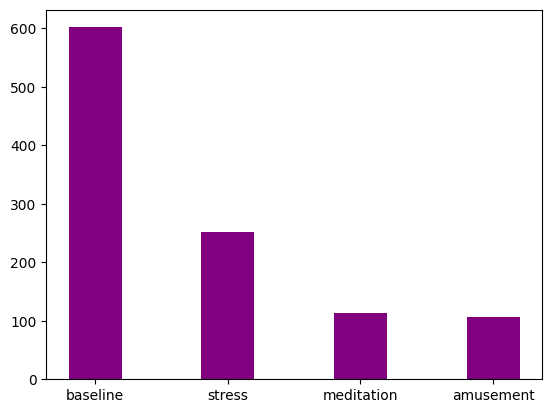

In [15]:
conditions = dict(df['label_text'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='purple',
        width = 0.4)

In [17]:
feature = df.drop(columns=['subject', 'label_text'])

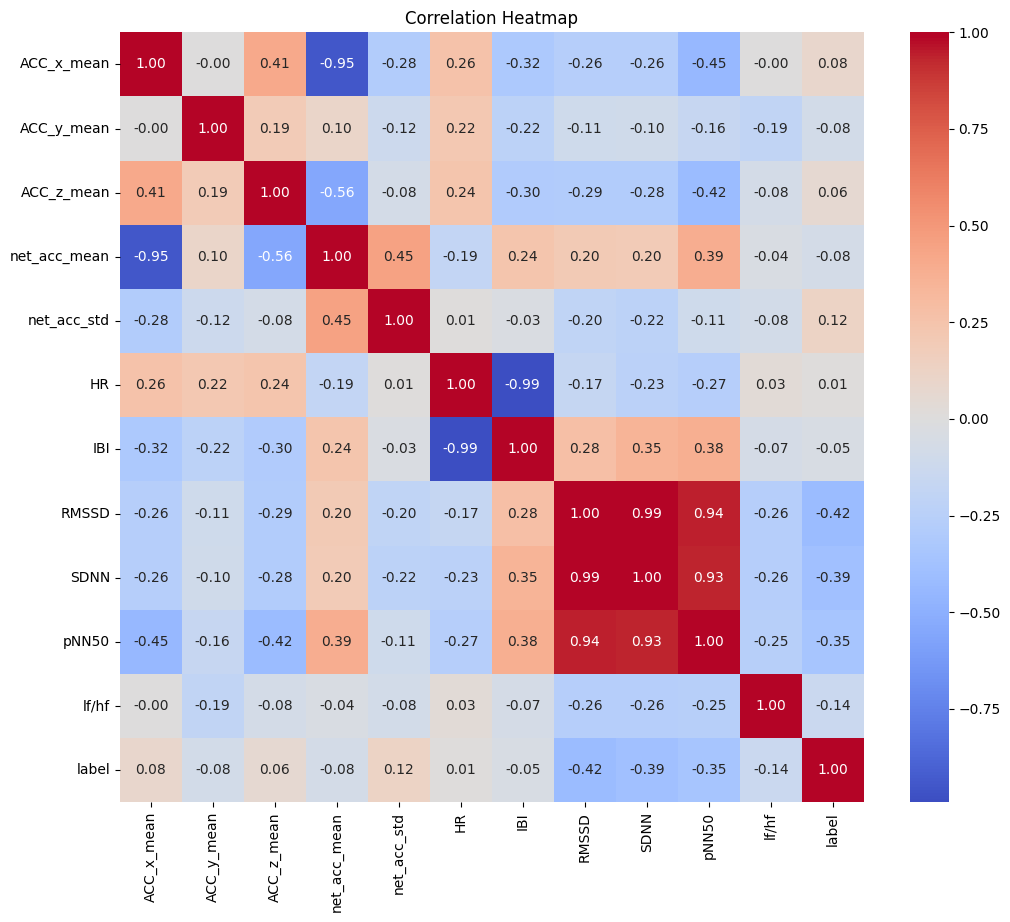

In [28]:
feature_only = feature.corr()
# Heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(feature_only.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [29]:
corr_matrix = feature_only.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print("Features to consider dropping (correlation > 0.9):", to_drop)

Features to consider dropping (correlation > 0.9): ['net_acc_mean', 'IBI', 'SDNN', 'pNN50']


In [31]:
data = df.drop(columns=to_drop)

In [32]:
data

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_std,HR,RMSSD,lf/hf,label,subject,label_text
0,37.715333,-35.027333,-9.694000,5.214880,75.081294,226.949936,1.475494,1,8,baseline
1,39.252000,-47.664667,7.822000,0.544205,63.966173,213.058396,5.933398,1,8,baseline
2,39.628667,-46.246667,9.764000,1.120992,66.372243,134.469912,44.207315,1,8,baseline
3,38.927333,-48.439333,6.083333,0.428267,78.588847,159.088795,707.930928,1,8,baseline
4,38.919333,-47.006667,-0.914667,1.166077,65.088073,199.098718,6.149627,1,8,baseline
...,...,...,...,...,...,...,...,...,...,...
1070,46.964000,-8.760000,-7.498667,2.985640,81.961468,238.947514,4.036088,2,15,stress
1071,33.698667,3.725333,49.853333,2.770939,101.350382,252.891267,1.921900,2,15,stress
1072,31.114000,4.294000,52.504667,2.406421,90.927874,207.303412,1.107406,2,15,stress
1073,28.826667,-17.737333,17.747333,6.112821,98.456919,282.197210,15.788516,2,15,stress


In [33]:
X = data.drop(columns=['label', 'subject', 'label_text'])
y = data['label']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = RandomForestClassifier()

In [40]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = model.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.72      0.92      0.81       115
           2       0.75      0.81      0.78        48
           3       0.33      0.05      0.08        22
           4       0.62      0.27      0.37        30

    accuracy                           0.72       215
   macro avg       0.60      0.51      0.51       215
weighted avg       0.67      0.72      0.67       215



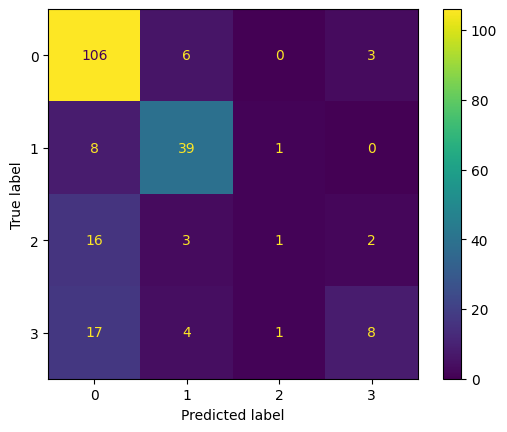

In [45]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()